Original Shape: (506, 14)

Model Performance:
Mean Squared Error (MSE): 25.04
Root Mean Squared Error (RMSE): 5.00
R² Score: 0.66

Sample Predictions:
      Actual  Predicted
173    23.6  29.147320
274    32.4  36.590788
491    13.6  14.501843
72     22.8  25.097468
452    16.1  18.462567


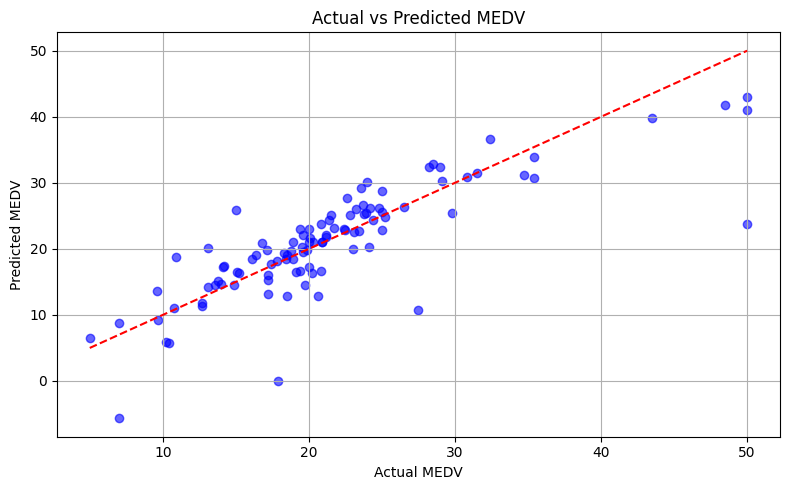

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load dataset
df = pd.read_csv('/home/jayesh/Desktop/dsbda/dataset/HousingData.csv')
print("Original Shape:", df.shape)
df
# Step 2: Handle missing values
df['CRIM'] = df['CRIM'].fillna(df['CRIM'].mean())
df['ZN'] = df['ZN'].fillna(df['ZN'].mean())
df['INDUS'] = df['INDUS'].fillna(df['INDUS'].mean())
df['CHAS'] = df['CHAS'].fillna(df['CHAS'].mode()[0])  # categorical
df['AGE'] = df['AGE'].fillna(df['AGE'].mean())
df['LSTAT'] = df['LSTAT'].fillna(df['LSTAT'].mean())

# Step 3: Define features and target
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Step 4: Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Predict on the test set
y_pred = model.predict(X_test)

# Step 7: Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Step 8: Optional - Compare actual vs predicted
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nSample Predictions:\n", comparison_df.head())

# Step 9: Optional - Plot actual vs predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # reference line
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs Predicted MEDV')
plt.grid(True)
plt.tight_layout()
plt.show()

#plt.hist(df['MEDV'], bins=20, color='skyblue', edgecolor='black')
#plt.xlabel('House Price (in $1000s)')
#plt.ylabel('Frequency')
#plt.title('Distribution of House Prices')
#plt.show()